In [1]:
import os
from glob import glob
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [2]:
data_path ='D:/TugasAkhir/DataSet/MoNuSAC_images_and_annotations'
masks_path ='D:/TugasAkhir/DataSet/MoNuSAC_masks_New'

In [3]:
type_label = {1:'Epithelial',
              2:'Lymphocyte',
              3:'Macrophage',
              4:'Neutrophil'}

In [4]:
colors={1:(1,0,0), #Red for Epithelial
       2:(1,1,0), #Yellow for Lymphocyte
       3:(0,1,0), #Green for Macrophage
       4:(0,0,1)} #Blue for Neutrophil

In [5]:
def apply_mask_colored(image,mask,color,alpha=0.5):
    """Apply the giveb mask to the image.
    With color
    """
    masked_image=image.astype(np.uint32).copy()
    for c in range(3):
        masked_image[:,:,c]=np.where(mask==255,masked_image[:,:,c]*(1-alpha)+alpha*color[c]*255,masked_image[:,:,c])
    return masked_image

In [6]:
def visualize_cells(image,masks,colors,figsize=(7,7),title=None):
    _,ax = plt.subplots(1,figsize=figsize)
    height,width=image.shape[:2]
    ax.set_ylim(height+10,-10)
    ax.set_xlim(-10,width+10)
    ax.axis('off')
    ax.set_title(title)
    
    masked_image = image.astype(np.uint32).copy()
    for i in range(4):
        color=colors[i+1] #colors in dictionary
        
        #load masks
        mask = masks[:,:,i]
        masked_image = apply_mask_colored(masked_image, mask, color)
    ax.imshow(masked_image.astype(np.uint8))

In [7]:
patients =[x[0] for x in os.walk(data_path)]

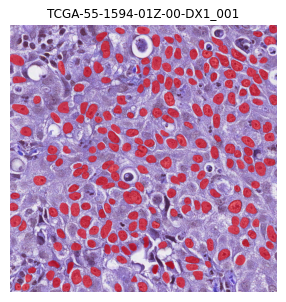

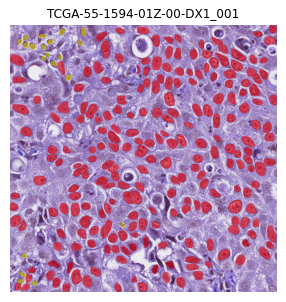

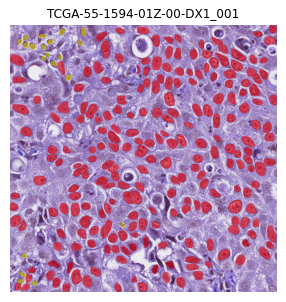

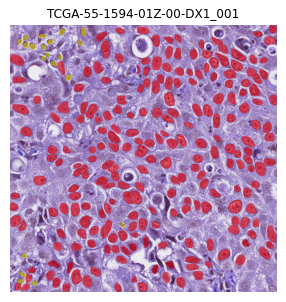

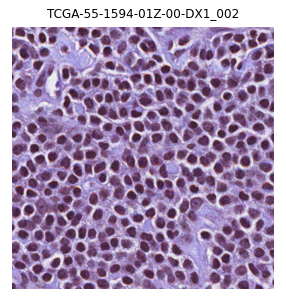

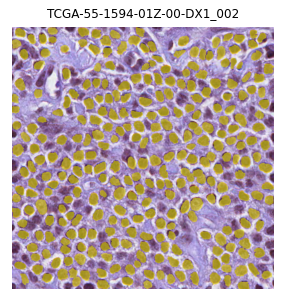

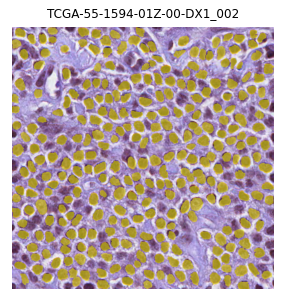

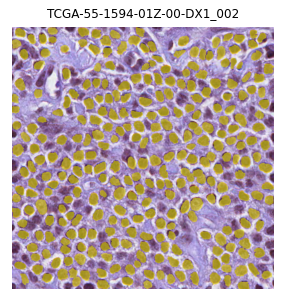

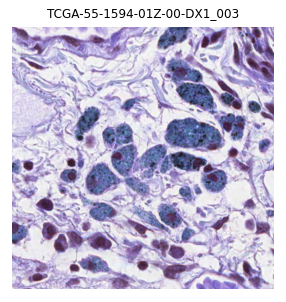

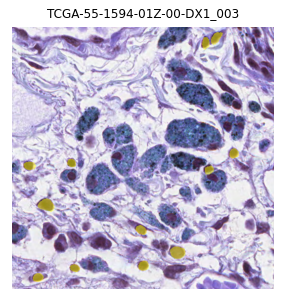

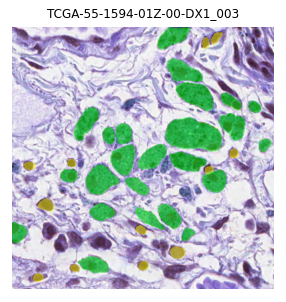

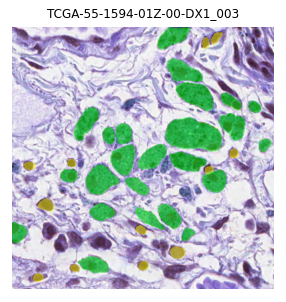

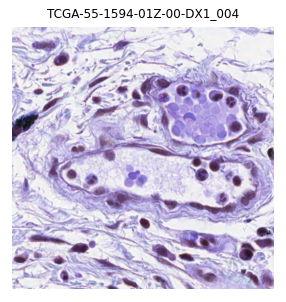

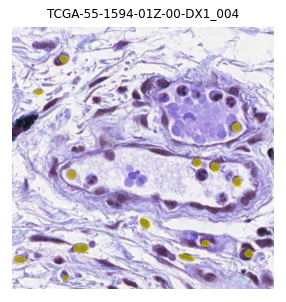

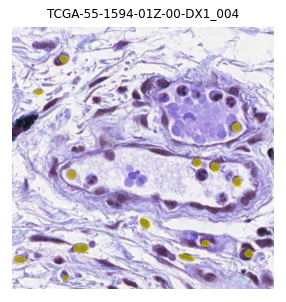

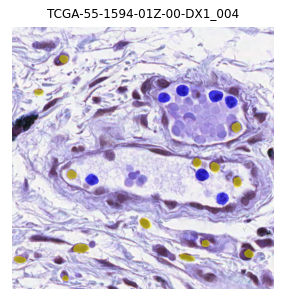

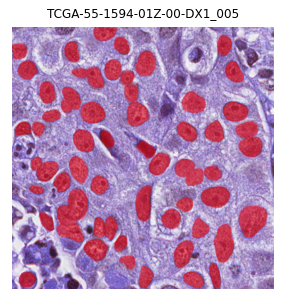

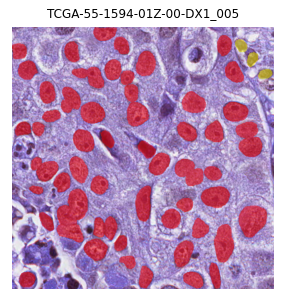

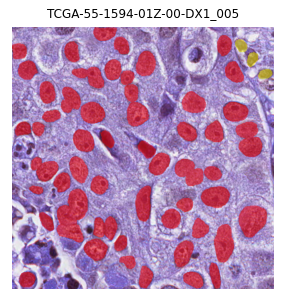

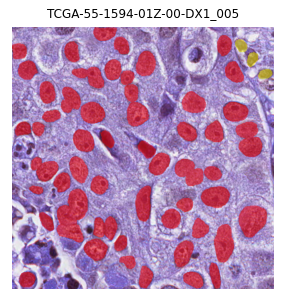

In [8]:
for patient_loc in patients[1:2]: #patients<-to extract all data ; patients[1:2]
    patient_name = patient_loc[len(data_path)+1:]
    sub_images = glob(patient_loc+'/*.tif')
    #print(sub_images)
    #print(patient_name)
    for sub_image_loc in sub_images: #sub_images<-for all images in each patient
        sub_image_name = sub_image_loc[len(data_path)+len(patient_name)+2:-4]
        #print(sub_image_name) #to print image_name
        #print(sub_image_loc) #to print the location of image_name file
        img = io.imread(sub_image_loc)
        bin_path = os.path.join(masks_path,patient_name,sub_image_name)
        #print(bin_path)
        
        masks = np.zeros((img.shape[0],img.shape[1],4),dtype='uint8')
        for i in range(4):
            dir_mask = os.path.join(bin_path,type_label[i+1])
            #print(dir_mask)
            sub_masks = glob(dir_mask+'/*.tif')
            #print(sub_masks)
            if len(sub_masks)!=0:
                #print(sub_masks[0])
                mask =io.imread(sub_masks[0])
                masks[:,:,i] = mask
            visualize_cells(img, masks,colors, figsize=(5,5), title=sub_image_name)